# This code:
- Makes a stratigraphic chart of the initial and boundary conditions imposed in Wang's models
- Plots the initial and boundary conditions imposed in Wang's models as a map

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Stratigraphic chart 

In [2]:
path=''

#Loading time scale
SeriesEpoch=pd.read_table('Series_epoch_boundaries.csv', sep=',')

# Sea-level
#https://www.science.org/doi/10.1126/sciadv.aaz1346
Miller=pd.read_csv('Miller_et_al_2020_sea_level.csv',header=0) 

#Climatic isotopic records
#https://www.science.org/doi/10.1126/science.1059412
Zachos=pd.read_csv('zachos_291121.csv', sep=',', header=0)


# Temperature - Cramer
#https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011JC007255
#https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1029%2F2011JC007255&file=jgrc12191-sup-0016-ts06.txt
temp=pd.read_csv('Cramer_Temperature.txt', sep='\t', header=0, skiprows=[454,486, 487, 488, 489, 490] )


In [37]:
axes[0]

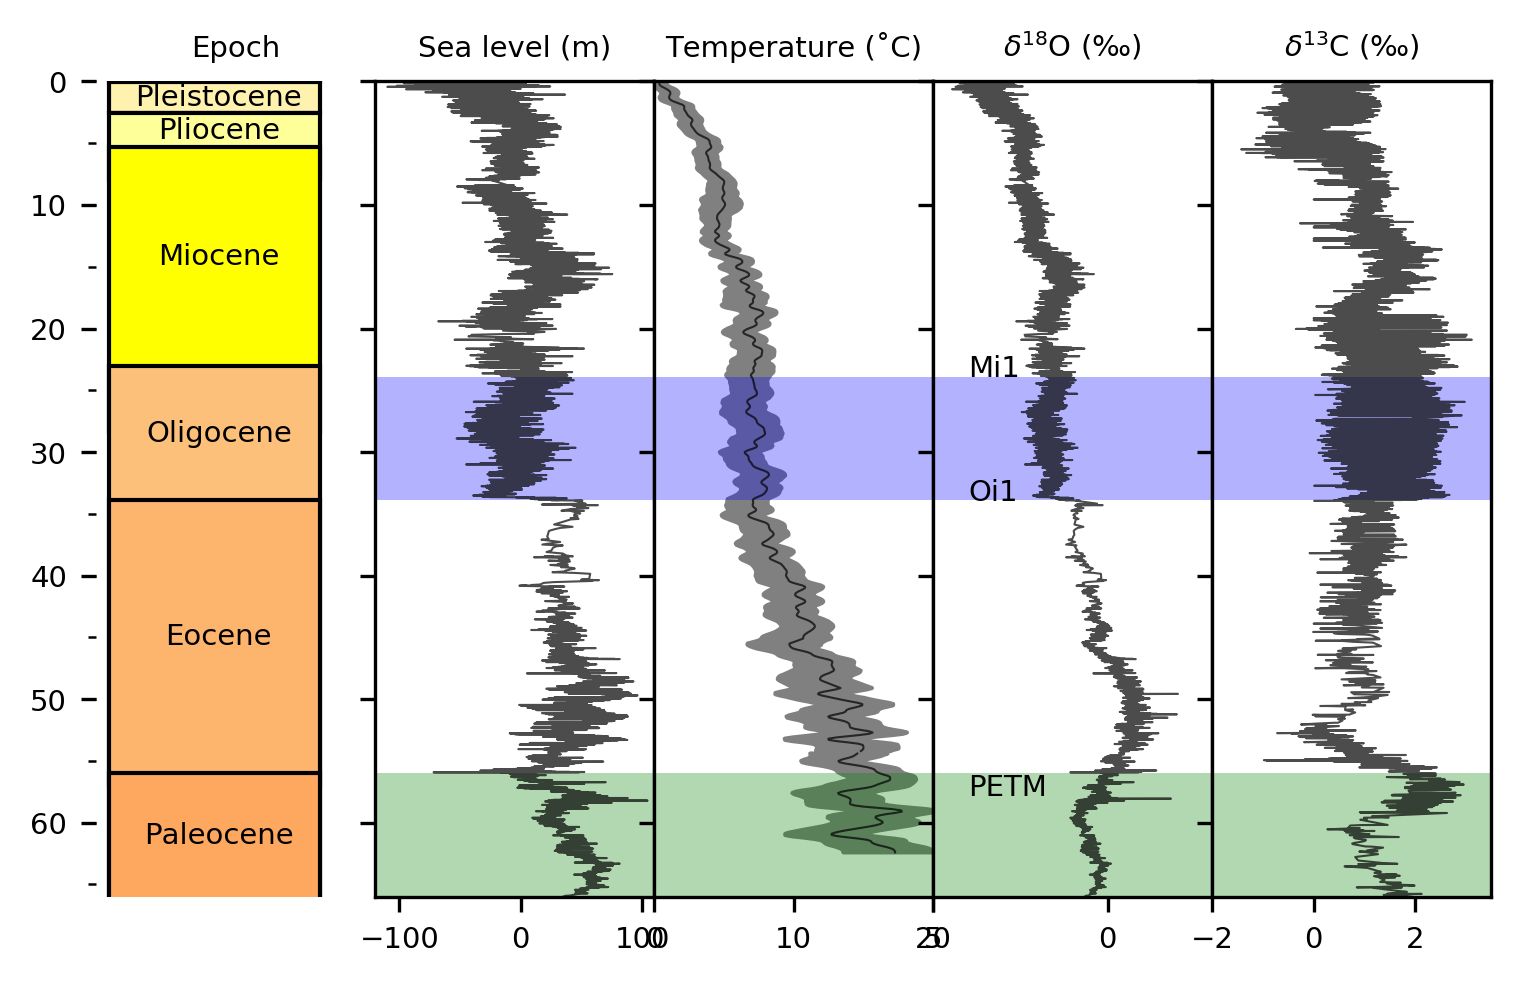

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15/2.5,9/2.5), sharey=True, dpi=300)#constrained_layout=True
plt.rc("font", size=7); plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42


vertmax=int(SeriesEpoch.Series_epoch_value[SeriesEpoch.Series_epoch_name=='L Cretaceous'])
vertdiff=10
v=0
vtext=13
v3=25
c=20
c2=30
r=26

#####################
#Ploting Epoch boxes#
#####################
ax1=plt.subplot2grid((1,5),(0,0), colspan=1, rowspan=5)

ax1.plot(np.linspace(0,c2,5), np.linspace(0,vertmax,5), alpha=0)
for k in np.arange(1,int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0])+1,1):
    rect=Rectangle((v, SeriesEpoch.Series_epoch_value[k-1]), 
                       v3,SeriesEpoch.Series_epoch_value[k],
                facecolor=(SeriesEpoch.rse[k-1]/255, SeriesEpoch.gse[k-1]/255, SeriesEpoch.bse[k-1]/255,1), zorder=1, edgecolor='k')
    ax1.add_patch(rect)
    
    if k<int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,((SeriesEpoch.Series_epoch_value [k+1]+SeriesEpoch.Series_epoch_value [k])/2), 
                 SeriesEpoch.Series_epoch_name[k], verticalalignment='center', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
    if k==int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,SeriesEpoch.Series_epoch_value [k]+2, 
             SeriesEpoch.Series_epoch_name[k], verticalalignment='top', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
ax1.invert_yaxis()
ax1.set_title('Epoch', fontsize=7)

###################
#Ploting sea level#
###################
ax2=plt.subplot2grid((1,5),(0,1), colspan=1, rowspan=5)
ax2.plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k', alpha=0.7, linewidth=0.5)
ax2.set_title('Sea level (m)', fontsize=7)


#####################
#Ploting Temperature#
#####################
ax3=plt.subplot2grid((1,5),(0,2), colspan=1, rowspan=5)
ax3.fill_betweenx(temp.Age,temp['Temperature min'], temp['Temperature max'], color='grey')

# ax3.fill_between(temp['Temperature min'], temp.Age)
ax3.plot(temp.Temperature,temp.Age, linewidth=0.5,  color='k', alpha=0.7)
# ax3.plot(temp['Temperature max'], temp.Age, linewidth=0.5, color='k')
# ax3.plot(temp['Temperature min'], temp.Age, linewidth=0.5, color='k')
ax3.set_title('Temperature (˚C)', fontsize=7)
ax3.invert_yaxis()

#############
#Ploting d18#
#############
ax4=plt.subplot2grid((1,5),(0,3), colspan=1, rowspan=5)
ax4.plot(Miller.oxygen, Miller.age_ka/1e3, color='k', alpha=0.7, linewidth=0.5)

ax4.text(4,56, 'PETM', verticalalignment='top')
ax4.text(4,33.9,'Oi1')
ax4.text(4,23.9,'Mi1')
ax4.set_title('$\delta$$^{18}$O (‰)', fontsize=7)
# ax4.set_title('Pacific $\delta$$^{18}$O$_{Cibicidoides}$')
ax4.invert_xaxis()
ax4.invert_yaxis()

#############
#Ploting d13#
#############
ax5=plt.subplot2grid((1,5),(0,4), colspan=1, rowspan=5)
# to fix the PETM offset to Zachos.Age_Ma+0.9 
ax5.plot( Zachos.d13C, Zachos.Age_Ma, linewidth=0.5,  color='k', alpha=0.7)
ax5.set_title('$\delta$$^{13}$C (‰)', fontsize=7)
ax5.invert_yaxis()


#################################
#plotting icehouse and greenhouse#
#################################
IH=[23.9, 23.9, 33.9,33.9]
GH=[56, 56, 66, 66]
ax2_lims=[-120,110,110, -120]
ax3_lims=[0,20,20,0]
ax4_lims=[5,-3,-3, 5]
ax5_lims=[-2, 3.5, 3.5, -2]

ax2.fill(ax2_lims, GH, facecolor='green', alpha=0.3, edgecolor='none', zorder=1)
ax3.fill(ax3_lims, GH, facecolor='green', alpha=0.3, edgecolor='none')
ax4.fill(ax4_lims, GH, facecolor='green', alpha=0.3, edgecolor='none')
ax5.fill(ax5_lims, GH, facecolor='green', alpha=0.3, edgecolor='none')
ax2.fill(ax2_lims, IH, facecolor='blue', alpha=0.3, edgecolor='none')
ax3.fill(ax3_lims, IH, facecolor='blue', alpha=0.3, edgecolor='none')
ax4.fill(ax4_lims, IH, facecolor='blue', alpha=0.3, edgecolor='none')
ax5.fill(ax5_lims, IH, facecolor='blue', alpha=0.3, edgecolor='none')

############
#Formatting#
############

hide_tick_labels = True
if hide_tick_labels :
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax4.set_yticklabels([])
    ax5.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_xticks([])

ax1.set_yticks(np.arange(0,vertmax,5), minor=True)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.set_xlim(ax2_lims[0:2])
ax3.set_xlim(ax3_lims[0:2])
ax4.set_xlim(ax4_lims[0:2])
ax5.set_xlim(ax5_lims[0:2])

ax1.set_ylim(vertmax,0);ax2.set_ylim(vertmax,0);ax3.set_ylim(vertmax,0);ax4.set_ylim(vertmax,0);ax5.set_ylim(vertmax,0)


# plt.tight_layout(0)
# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.jpg' , dpi=300)

plt.subplots_adjust(wspace=0)

# plt.savefig(path+'/Documents/1.Projects/NA_drainage/Strat_chart.pdf' , dpi=300)


In [4]:
#12:01 ticks on x axis, do them altenate on top and bottom so that they don't run into each other

#add proper ticks in y axis, specially in first panel, why do they look ofset?
#gap between panel 1 and 2
# dc13 record seems  offset in time, I think because it's using an older time scale and the age of the PETM has changed

#Why does the Paleocene doesn't have a line in the bottom?

#flip epock names?
#add series names?
